In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [95]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/Bigdata/01 실습파일/2. Big Data 분석')

In [116]:
df_raw = pd.read_csv('SCALE불량.csv',encoding='euc-kr')
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [117]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [118]:
df_raw.columns

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [119]:
# df_raw = df_raw.drop(columns=['plate_no'])
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [120]:
# rolling_date를 오전/오후로 바꾸기
df_raw['rolling_date'] = df_raw['rolling_date'].str.split(':').str[1].astype(int)
df_raw['rolling_date'] = df_raw['rolling_date'].apply(lambda x: 'AM' if x < 12 else 'PM')
df_raw = pd.get_dummies(df_raw, columns=['rolling_date'])

In [121]:
import pandas as pd

# 범주형 변수들만 선택
categorical_columns = df_raw.select_dtypes(include=['object']).columns

# 범주형 변수들에 대해 원-핫 인코딩 수행
df_encoded = pd.get_dummies(df_raw, columns=categorical_columns, drop_first=True)

# 결과 확인
df_encoded.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,spec_country_한국,steel_kind_T,hsb_적용,fur_no_2호기,fur_no_3호기,fur_input_row_2열,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조
0,32,3700,15100,1144,116,1133,59,259,934,8,...,0,1,1,0,0,0,1,0,0,0
1,32,3700,15100,1144,122,1135,53,238,937,8,...,0,1,1,0,0,1,1,0,0,0
2,33,3600,19200,1129,116,1121,55,258,889,8,...,0,1,1,1,0,0,1,0,0,0
3,33,3600,19200,1152,125,1127,68,266,885,8,...,0,1,1,1,0,1,1,0,0,0
4,38,3100,13300,1140,134,1128,48,246,873,8,...,0,1,1,0,1,0,1,0,0,0


In [122]:
# scale에 대해 확인
df_raw['scale'].describe()

count     1000
unique       2
top         양품
freq       690
Name: scale, dtype: object

### 1. 변수들을 전체 확인

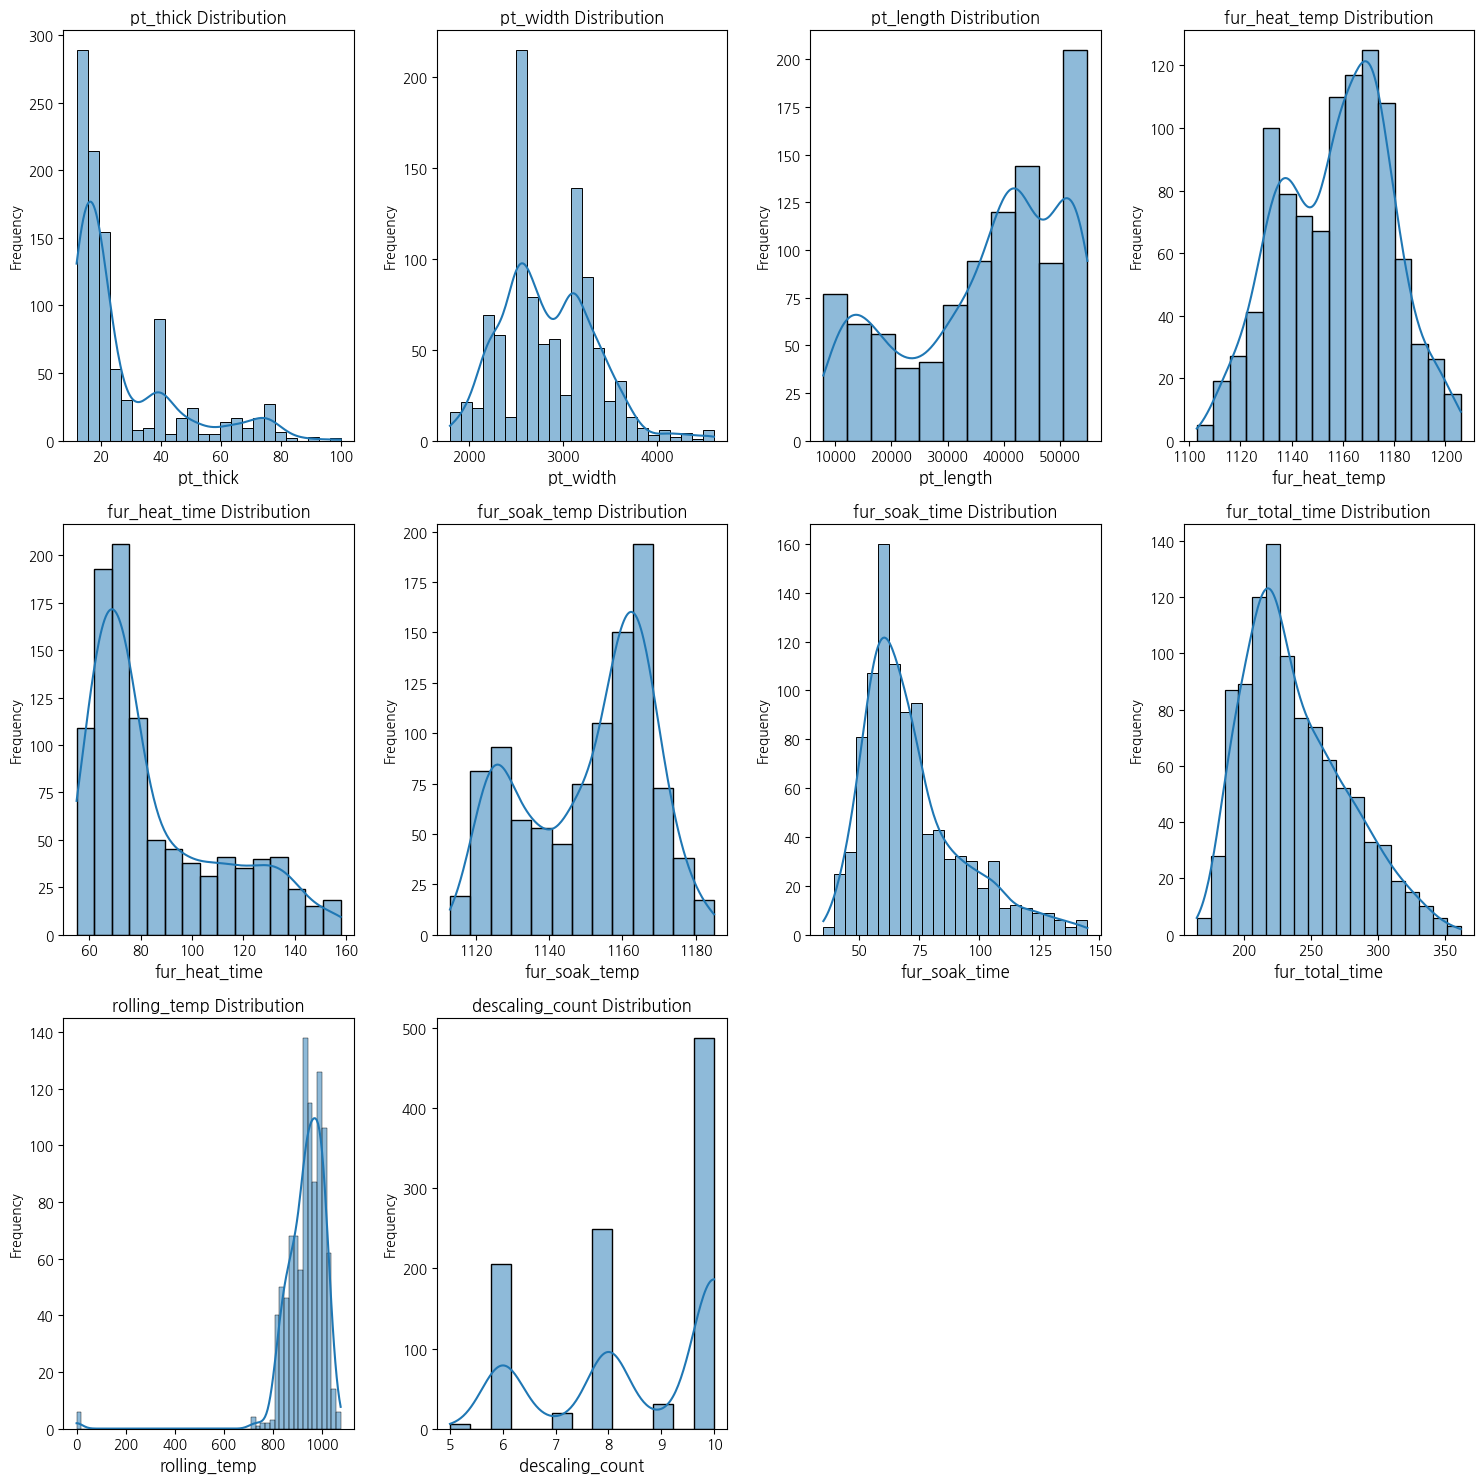

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수 목록 (수치형 변수만 히스토그램을 그리기)
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# 한 화면에 여러 개의 히스토그램을 그리기 위해 subplot 설정
n_cols = 4  # 한 행에 4개 그래프
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # 행의 개수 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱스로 접근

# 각 변수에 대해 히스토그램 그리기
for i, col in enumerate(numeric_columns):
    sns.histplot(df_raw[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution', fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=10)  # 글씨 크기 조정

# 나머지 빈 서브플롯에 대해 숨기기
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # 그래프 간격 조정
plt.show()

### ✅ **정리 포인트**

>**오른쪽 왜도 (Positive skew)**: pt_thick, fur_heat_time, fur_soak_time, fur_total_time → 데이터가 왼쪽(작은 값)에 몰려 있고, 오른쪽 꼬리가 길어요.

**1. pt_thick** → 대부분 얇거나 짧은 시간 등 표준적인 조건에서 생산됨.(두꺼운 제품에서 불량률이 높을 수 있음)

**2. fur_heat_time** → 짧은 시간에 많이 가열되고 있음.(시간이 너무 짧거나 너무 길면 불량 위험)

**3. fur_soak_time** → 짧게 유지하는 것이 일반적이나, 너무 짧으면 열처리 부족으로 불량 가능성

**4. fur_total_time** → 대부분 일정 범위에서 열처리 진행 (가공 공정 최적화 판단 기준이 될 수 있음)

>**대칭적 분포 (Normal-like)**: fur_heat_temp, fur_soak_temp, rolling_temp
→ 정규분포 또는 거의 유사

**1. fur_heat_temp** → 공정 온도가 안정적으로 유지되고 있음(불량이 생긴다면 온도보다는 다른 요인 때문일 수 있음)

**2. fur_soak_temp** → 열 유지 온도 역시 잘 관리되고 있음(이상값(outlier) 제외하면 별도 보정 불필요)

**3. rolling_temp** → 압연 온도 역시 잘 통제됨

>**복잡한 멀티모달 또는 이산 분포**: pt_width, pt_length, descaling_count
→ 특정 구간이나 값에 몰림

**1. pt_width** → 특정 구간(3000~4000)에 집중적으로 몰림, 봉우리가 여러 개 있음(→ 제품 폭이 몇 가지 기준 사이즈로 고정되어 있음)

**2. pt_length** → 길이 구간별로 봉우리가 존재, 멀티모달 가능성(→ 제품 사양 반영 가능성, **특정 길이에서만 불량 집중될 가능성 있음**)

**3. descaling_count** → 값이 0, 4, 8, 10 등에 몰린 이산값 분포(→ **각 횟수별 불량률 비교가 핵심**)

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,rolling_date_AM,rolling_date_PM
0,PLT_1001,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,116,1133,59,259,TMCP(온도제어),934,8,1조,1,0
1,PLT_1002,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,122,1135,53,238,TMCP(온도제어),937,8,1조,1,0
2,PLT_1003,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,116,1121,55,258,TMCP(온도제어),889,8,1조,1,0
3,PLT_1004,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,125,1127,68,266,TMCP(온도제어),885,8,1조,1,0
4,PLT_1005,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,134,1128,48,246,TMCP(온도제어),873,8,1조,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,55,1151,86,203,CR(제어압연),948,10,4조,1,0
996,PLT_1997,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,55,1151,86,209,CR(제어압연),948,10,4조,1,0
997,PLT_1998,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,65,1163,77,227,CR(제어압연),948,10,4조,1,0
998,PLT_1999,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,65,1163,77,204,CR(제어압연),948,10,4조,1,0


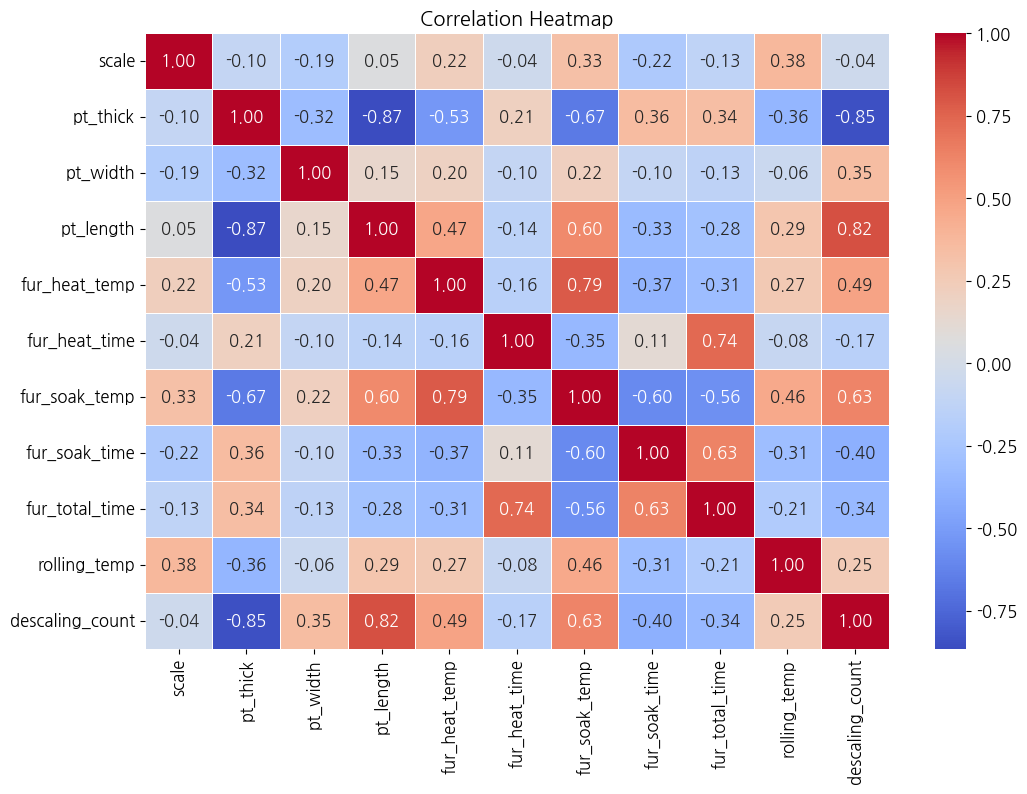

In [123]:
# scale이 숫자가 아닐 경우 변환 (예: 불량 → 1, 정상 → 0)

df_raw['scale'] = df_raw['scale'].map({'불량': 1, '양품': 0})
display(df_raw)
# 수치형 변수 선택
numeric_columns = df_raw.select_dtypes(include=['float64', 'int64']).columns

# 상관계수 행렬 계산
correlation_matrix = df_raw[numeric_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**<scale과 양의 관계>**
- 1. rolling_temp (0.38)
- 2. fur_soak_temp (0.33)
- 3. fur_heat_temp (0.22)
- 4. pt_length (0.05)

**<scale과 음의 관계>**
- 1. fur_soak_time (-0.22)
- 2. pt_width (-0.19)
- 3. fur_total_time (-0.13)
- 4. pt_thick (-0.10)

In [126]:
# # 그래프 크기 키우기
# plt.figure(figsize=(12, 6))
# # Boxplot 그리기
# df_raw.boxplot(rot=45)  # x축 라벨 45도 회전
# # 폰트 크기 키우기
# plt.rcParams.update({'font.size': 20})
# # 레이아웃 자동 조정 (겹침 방지)
# plt.tight_layout()
# # 그래프 표시
# plt.show()

In [124]:
# # pt_length값이 너무 커서 drop 해봄
# df_raw = df_raw.drop(columns=['pt_length'])

In [125]:
# # 그래프 크기 키우기
# plt.figure(figsize=(12, 6))
# # Boxplot 그리기
# df_raw.boxplot(rot=45)  # x축 라벨 45도 회전
# # 폰트 크기 키우기
# plt.rcParams.update({'font.size': 20})
# # 레이아웃 자동 조정 (겹침 방지)
# plt.tight_layout()
# # 그래프 표시
# plt.show()

### 4. 대칭적 분포 변수 시각화 

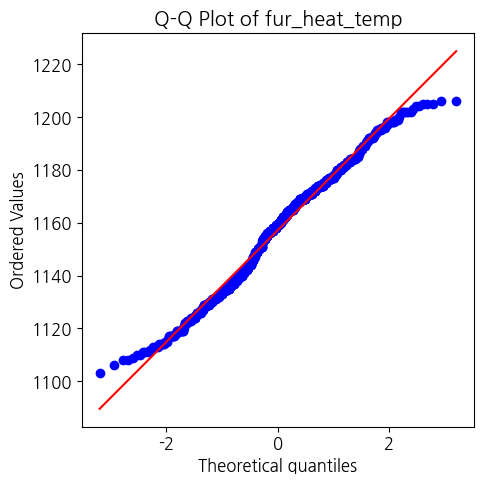

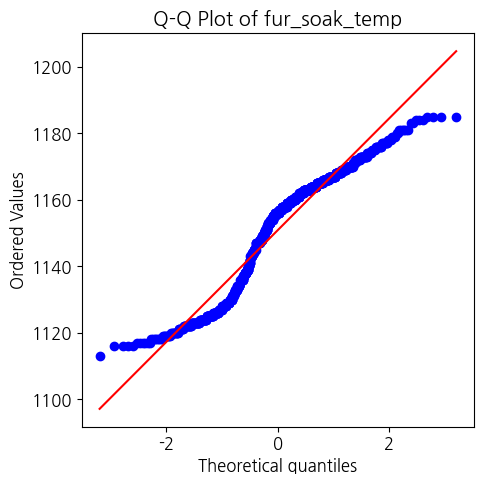

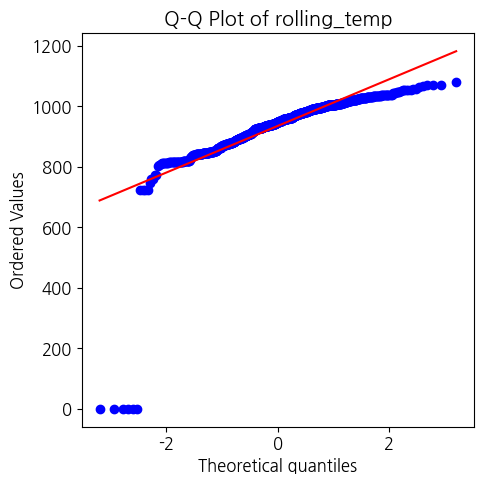

In [131]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# 대칭적 변수 예시
symmetric_vars = ['fur_heat_temp', 'fur_soak_temp', 'rolling_temp']

for var in symmetric_vars:
    plt.figure(figsize=(5, 5))
    stats.probplot(df_raw[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.tight_layout()
    plt.show()

### 5. 멀티모달 / 이산형 변수 시각화

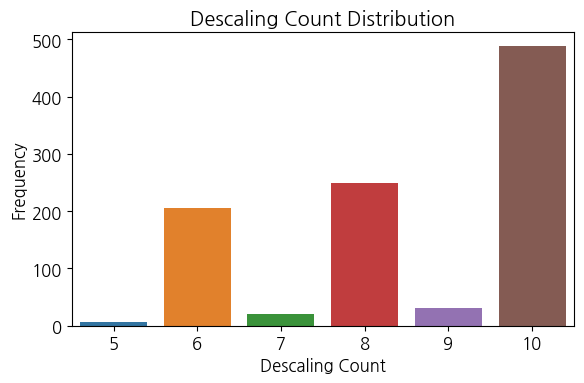

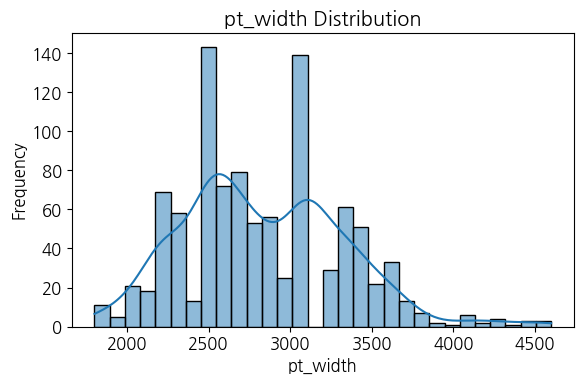

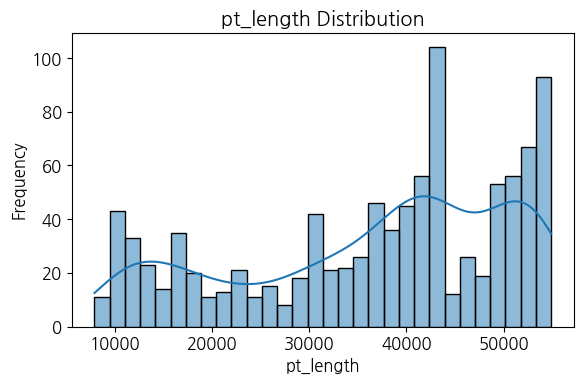

In [134]:
# 이산형: descaling_count
plt.figure(figsize=(6, 4))
sns.countplot(data=df_raw, x='descaling_count')
plt.title('Descaling Count Distribution')
plt.xlabel('Descaling Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 멀티모달 예시: pt_width, pt_length
multi_vars = ['pt_width', 'pt_length']
for var in multi_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_raw, x=var, bins=30, kde=True)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

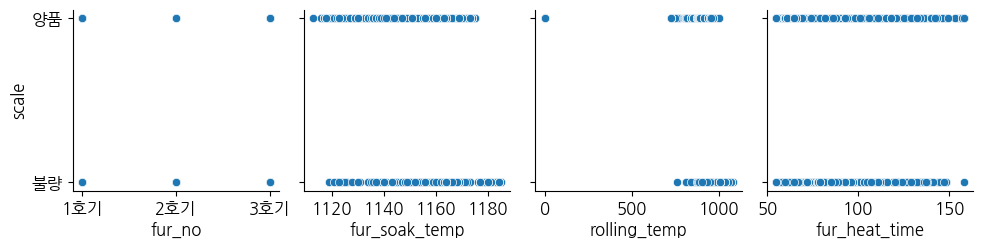

In [57]:
plt.rcParams.update({'font.size': 12})
sns.pairplot(df_raw, y_vars="scale", x_vars=["fur_no", "fur_soak_temp", "rolling_temp", "fur_heat_time"])

#### <분석>
- fur_no: 숫자별 불량/양품 분포가 비슷함 → 의미 있는 차이 없어 보임
- fur_soak_temp: 양품/불량 모두 비슷한 온도대에 있음 → 영향이 적어 보임
- rolling_temp: 양품/불량 모두 880~950도 사이에 고르게 있음 → 분리 안 됨
- **fur_heat_time**: 불량이 특정 시간대(특히 짧거나 긴 쪽)에 몰려 있는 느낌 있음 → **불량과 연관 가능성 있음**

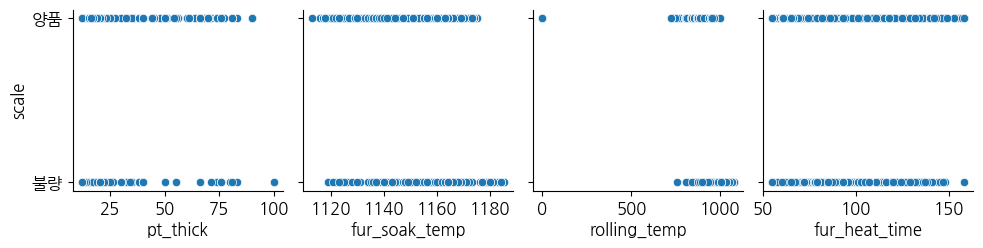

In [58]:
plt.rcParams.update({'font.size': 12})
sns.pairplot(df_raw, y_vars="scale", x_vars=["pt_thick", "fur_soak_temp", "rolling_temp", "fur_heat_time"])

# 1

- fur_heat_time에서 가열 시간이 짧을수록 불량 가능성 존재

"분포가 대칭적인데 왜 짧을수록 불량 가능성이 있는가?"
>분포가 대칭적인 것은 공정 전체가 안정적으로 조절됨을 의미

>불량인 데이터만 보면 주로 짧은 시간 쪽에 몰려 있음 → 짧을수록 불량 확률 ↑

✅ **요점 정리**
**전체 분포는 정규형이지만, 불량률은 짧은 시간에서 더 높음**

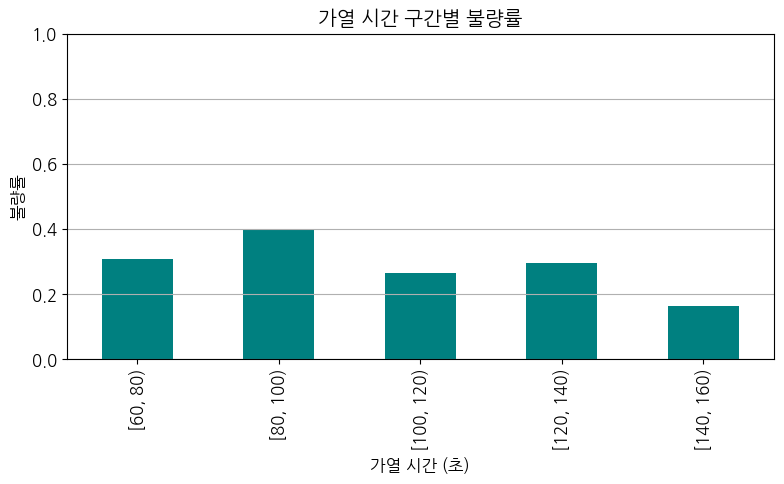

In [139]:
# 가열시간 구간 나누기
df_raw['heat_time_bin'] = pd.cut(df_raw['fur_heat_time'], bins=[60, 80, 100, 120, 140, 160], right=False)

# 불량률 계산
heat_time_defect_rate = df_raw.groupby('heat_time_bin')['scale'].mean()

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
heat_time_defect_rate.plot(kind='bar', color='teal')
plt.title('가열 시간 구간별 불량률')
plt.xlabel('가열 시간 (초)')
plt.ylabel('불량률')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2

- pt_thick에서 얇은 두께 분포가 많이 분포하기 때문에, 얇은 두께가 많아서 불량률이 얇은 두께에 더 많이 분포하는 지 알아볼 것이다.

#### 두께 구간별 불량률 막대그래프 (Binned Barplot)

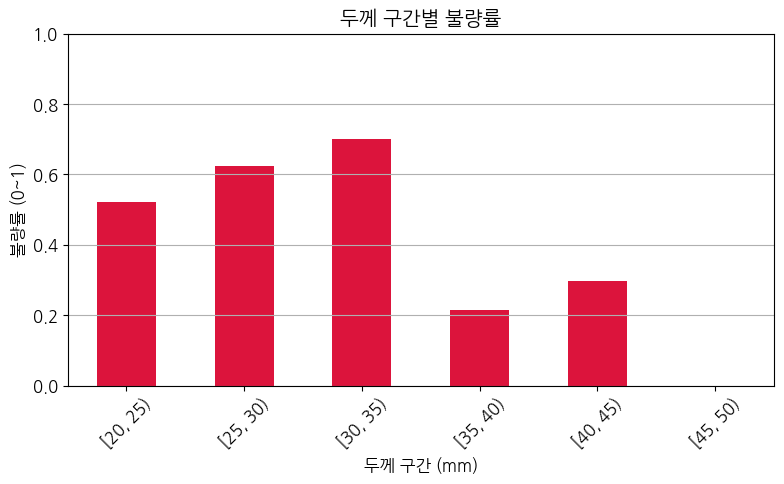

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# 두께 구간 나누기
df_raw['thick_bin'] = pd.cut(df_raw['pt_thick'], bins=[20, 25, 30, 35, 40, 45, 50], right=False)

# 구간별 불량률 계산 (불량 = 1 기준 평균)
# groupby().mean()은 scale이 1/0이니까 → 평균 = 불량률!
bin_defect_rate = df_raw.groupby('thick_bin')['scale'].mean()

# 시각화
plt.figure(figsize=(8, 5))
bin_defect_rate.plot(kind='bar', color='crimson')
plt.title('두께 구간별 불량률')
plt.ylabel('불량률 (0~1)')
plt.xlabel('두께 구간 (mm)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- **20 ~ 35(mm)사이의 두께가 점점 불량률이 높아지며, 35 ~ 50 (mm) 사이에서는 급격히 불량률이 낮아지는 것을 볼 수 있다.**

# 3

- descaling_count는 이산형 정수값이고, 특정 값(0, 4, 8, 10)에 몰려 있는 분포
- descaling 횟수와 불량의 관계가 있는지 확인

- 특정 횟수(예: 0, 4 등)에서 불량률이 유독 높다 → 해당 횟수가 불량 발생 원인으로 의심 가능
- 전체적으로 횟수 증가에 따라 불량률이 증가/감소한다 → 상관 관계가 있을 수 있음
- 고르게 분포되어 있다면 → 불량과 관련성 크지 않음

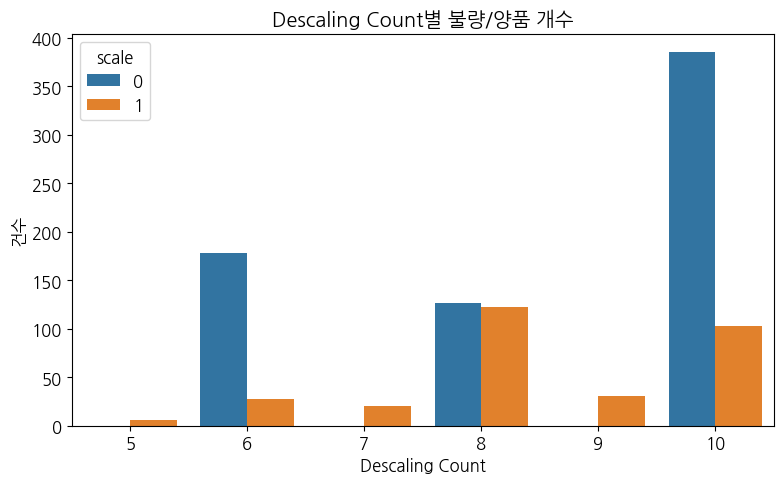

In [141]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df_raw, x='descaling_count', hue='scale')
plt.title('Descaling Count별 불량/양품 개수')
plt.xlabel('Descaling Count')
plt.ylabel('건수')
plt.tight_layout()
plt.show()

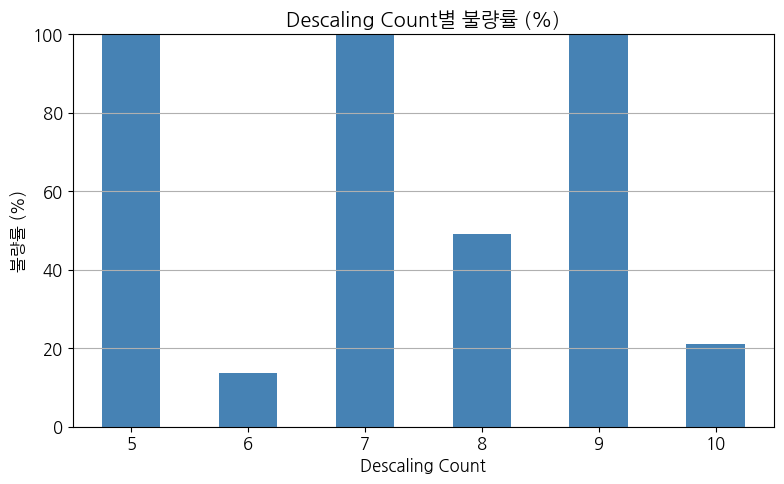

In [142]:
import matplotlib.pyplot as plt

# descaling_count별 불량률 계산 (%로 변환)
descaling_defect_rate = df_raw.groupby('descaling_count')['scale'].mean() * 100

# 시각화
plt.figure(figsize=(8, 5))
descaling_defect_rate.plot(kind='bar', color='steelblue')
plt.title('Descaling Count별 불량률 (%)')
plt.xlabel('Descaling Count')
plt.ylabel('불량률 (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

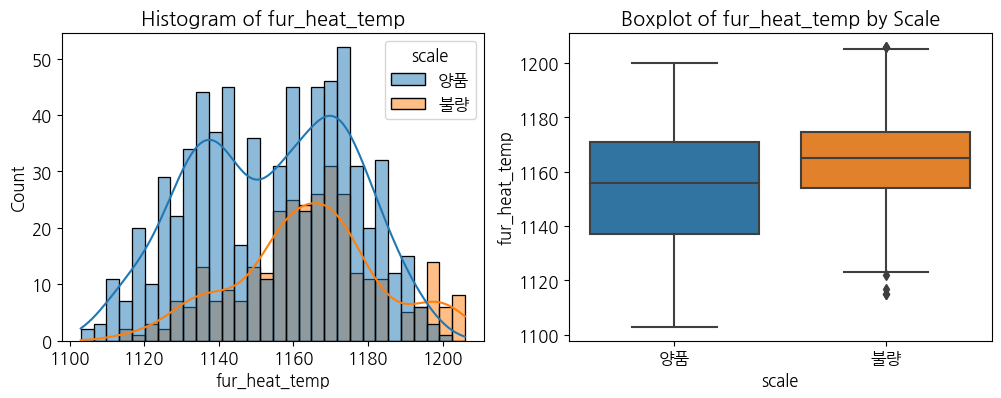

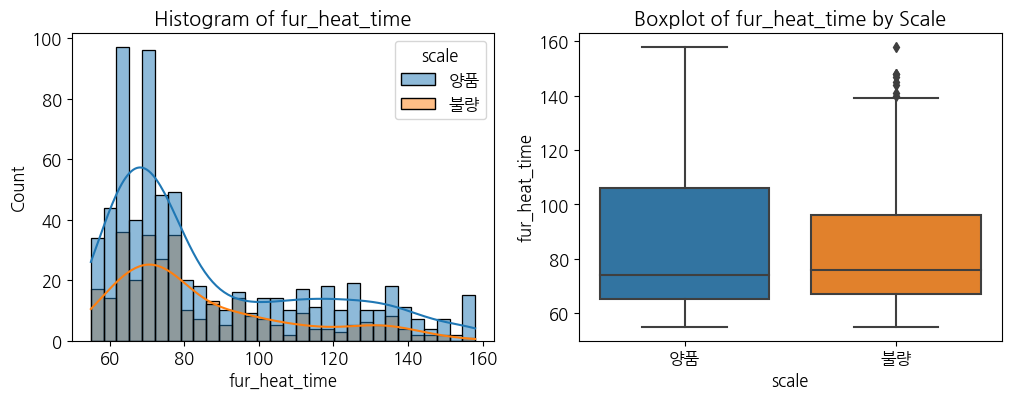

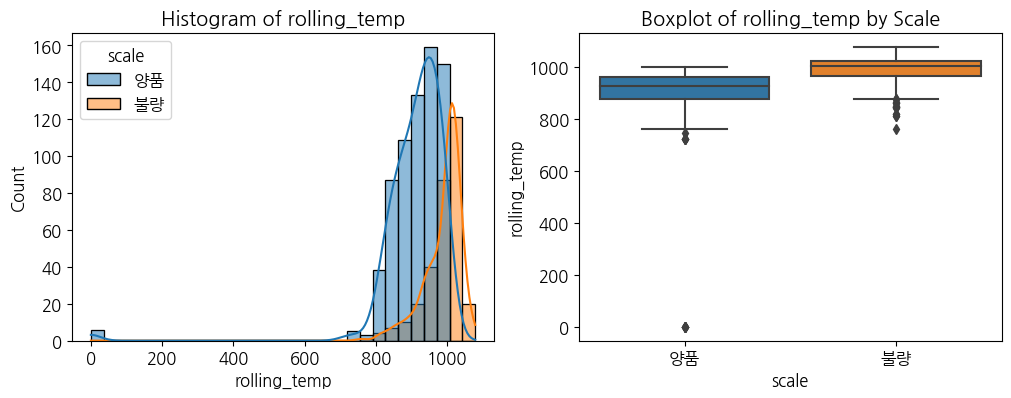

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 연속형 변수 목록
numeric_features = ['fur_heat_temp', 'fur_heat_time', 'rolling_temp']

# 히스토그램 & 박스플롯 그리기
for feature in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 히스토그램
    sns.histplot(data=df_raw, x=feature, hue='scale', kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Histogram of {feature}')
    
    # 박스플롯
    sns.boxplot(data=df_raw, x='scale', y=feature, ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature} by Scale')

    plt.show()

### **✅ 1. fur_heat_temp (가열 온도)**

📊 **히스토그램**
양품과 불량 모두 비슷한 온도 분포를 보이고 있음 (약 1130~1180도)

다만, 불량은 약간 오른쪽으로 치우쳐 있음 → 더 높은 온도에서 불량 많을 가능성 있음

📦 **Boxplot**
불량의 중앙값이 약간 더 높음

양품은 중앙값이 1150 근처, 불량은 그보다 약간 높음

이상치는 거의 없음

✅ **해석**:
→ 큰 차이는 아니지만, **가열 온도가 높을수록 불량 가능성 소폭 증가하는 경향**
→ 단독으로 강한 영향은 아닐 수 있음, **다른 조건과의 상호작용 가능성**

### ✅ **2. fur_heat_time (가열 시간)**
📊 **히스토그램**
양품은 전체적으로 길게 퍼져 있음 (60~150초 고르게 존재)

불량은 60~90초 구간에 뚜렷하게 몰려 있음

→ 시각적으로 짧은 가열 시간에서 불량 비율이 높음이 명확함!

📦 **Boxplot**
불량은 중앙값이 확실히 더 낮음

불량은 이상치가 거의 없고, 값이 전체적으로 낮은 쪽에 몰림

반면 양품은 길게 퍼져 있음

✅**해석**:
→ **짧은 가열 시간이 불량과 강하게 연관**됨
→ 예측 모델에서도 중요한 변수로 작용할 가능성 매우 높음
→ 공정상 **“최소 가열 시간” 기준을 설정**해야 할 수도 있음

### ✅**3. rolling_temp (압연 온도)**
📊 **히스토그램**
양품과 불량 모두 880~940도 사이에 몰려 있고, 차이 거의 없음

약간의 이상치(아주 낮은 온도)도 존재하나 극히 드묾

📦 **Boxplot**
두 그룹 모두 중앙값, IQR, 이상치 범위 거의 동일

→ 불량/양품 간 온도차 없음

✅ **해석**:
→ **압연 온도는 불량에 영향 거의 없음**

→ 변수 중요도에서 제외해도 무방하거나, 상호작용 변수로만 사용 가능

## 🧠**결론 및 인사이트 요약**

-  가장 중요한 변수:	fur_heat_temp, pt_thick, fur_heat_time, descaling_count
- 불량 예측에서 유효한 조건:	짧은 가열 시간, 얇은 두께, 특정 디스케일링 횟수, 높은 가열 온도